CS 675 Project#1

Loading and Understanding the Dataset

In [1]:
# import pandas library
import pandas as pd

# loading dataset
df = pd.read_csv("telco-customer-churn.csv")

Display some basic information by viewing first few rows of the dataset

In [2]:
# First few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Column and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Statistical Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Judging by looking at the information. it seems multiple columns require transformation from object Dtype to numerical form. Furthermore, the dataset needs to be checked for missing values and outliers before proceeding with EDA.

Step 1: Data Preparation and cleaning. 

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Converting the column'TotalCharges' to numeric since it is currently Object Dtype.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking for missing values after conversion
missing_values_after_conversion = df.isnull().sum()
missing_values_after_conversion

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It seems their are 11 missing values in the column 'total charges' conversion to numeric Dtype.

In [10]:
# Showing entries with NaN in TotalCharges
total_charges_na = df[df['TotalCharges'].isna()]
total_charges_na

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# Droping rows with missing TotalCharges values
df_cleaned = df.dropna(subset=['TotalCharges'])
df_cleaned.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values within the column 'total charges' have been removed. Now transforming categorical and string values to numeric values.

In [13]:
# Using label encoding for binary categorical columns and one-hot encoding for multi-class columns

# Binary categorical columns from (Yes/No) to 1/0
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_cleaned[binary_columns] = df_cleaned[binary_columns].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Multi-class categorical columns changed using One-Hot Encoding
multi_class_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_cleaned, columns=multi_class_columns, drop_first=True)

# Checking the newly encoded dataset
df_encoded.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17244\643410781.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[binary_columns] = df_cleaned[binary_columns].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
C:\Users\Asus\AppData\Local\Temp\ipykernel_17244\643410781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[binary_columns] = df_cleaned[binary_columns].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


Detecting and handling outliers. Using Boxplot and z-score method.

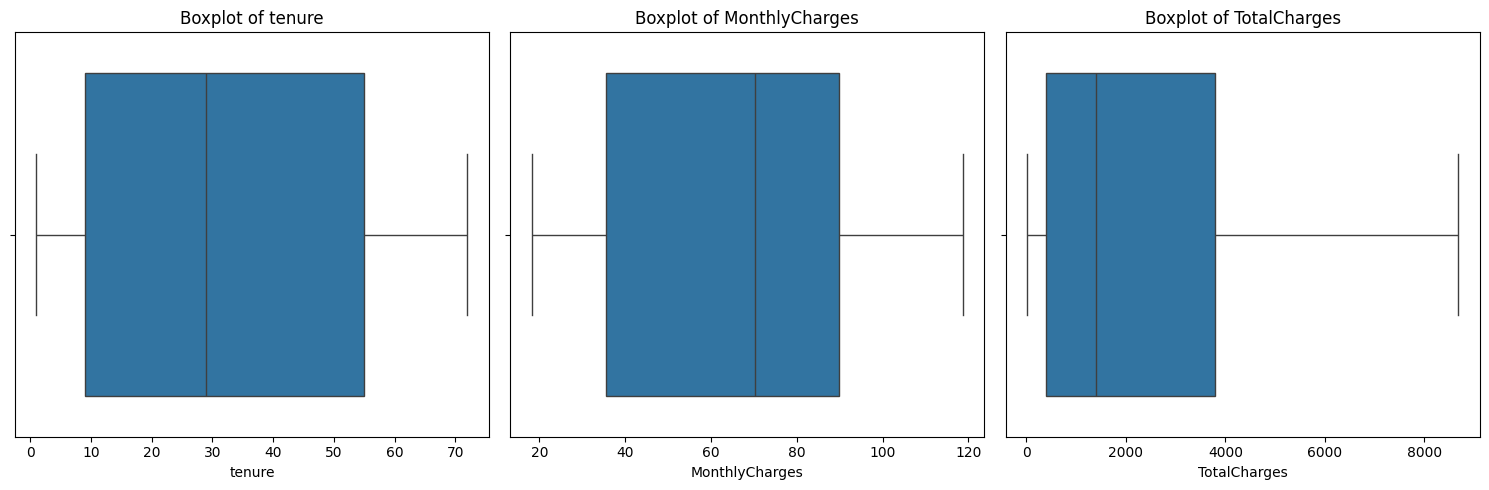

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking Numerical columns for outliers
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Creating boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [18]:
from scipy import stats

# Z-score 
z_scores = df_encoded[numerical_columns].apply(lambda x: stats.zscore(x))
outliers = (z_scores > 3) | (z_scores < -3)

# the number of outliers in each numerical column
outliers.sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Step 2: Listing all types of data, numeric, categorical, text.

In [19]:
# Lists for different types of columns
numeric_columns = []
categorical_columns = []
text_columns = []

# Checking each column's data type
for column in df_encoded.columns:
    if df_encoded[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    elif df_encoded[column].dtype == 'object':
        text_columns.append(column)
    else:
        categorical_columns.append(column)


# Displaying the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)


Numeric Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical Columns: ['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
Text Columns: ['customerID']


I have categorized columns in the form of three lists based on their Dtypes before proceeding with EDA. Since Customer ID is text column. I will be excluding it from the EDA since it is only an identifier.

Step 3: Exploratory Data Analysis

Correlation Heatmap

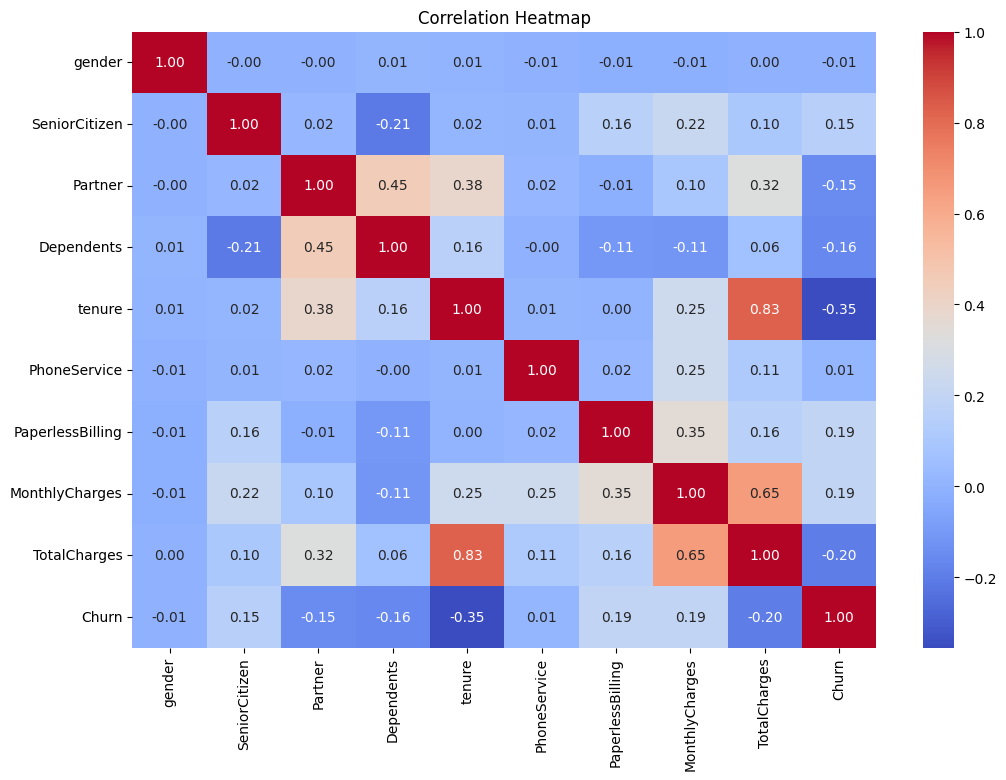

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Determining Feature importance for target variable using a decision tree.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y) for numerical columns (excluding 'customer ID')
X = df_encoded.drop(columns=['Churn', 'customerID'])  
y = df_encoded['Churn']                               

# Splitting the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
feature_importance = clf.feature_importances_

# DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying feature importance
print(feature_importance_df)

                                  Feature  Importance
4                                  tenure    0.214564
7                          MonthlyCharges    0.190137
8                            TotalCharges    0.183929
11            InternetService_Fiber optic    0.111978
0                                  gender    0.031594
2                                 Partner    0.027313
1                           SeniorCitizen    0.019321
3                              Dependents    0.019009
16                       OnlineBackup_Yes    0.018934
10                      MultipleLines_Yes    0.017696
6                        PaperlessBilling    0.017621
28         PaymentMethod_Electronic check    0.017536
27  PaymentMethod_Credit card (automatic)    0.016715
14                     OnlineSecurity_Yes    0.016541
18                   DeviceProtection_Yes    0.015619
25                      Contract_One year    0.014108
29             PaymentMethod_Mailed check    0.013171
20                        Te

Visualizing importance features in relation to churn

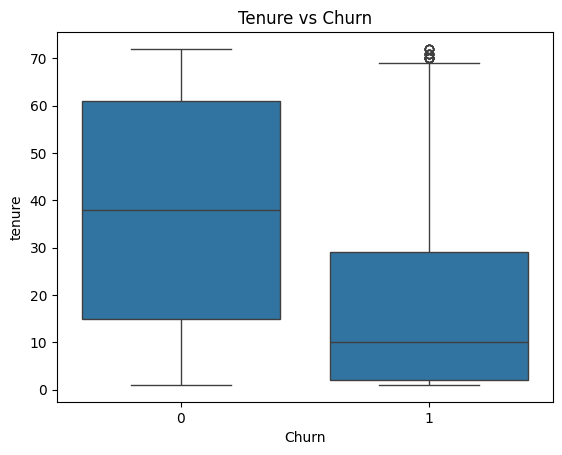

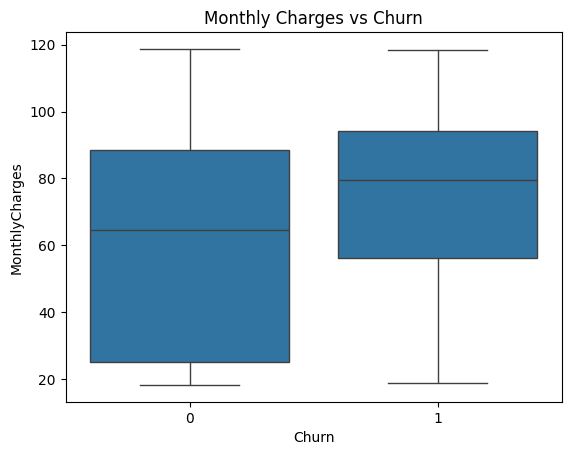

In [22]:
# Dstribution of important features vs Churn
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df_encoded)
plt.title('Monthly Charges vs Churn')
plt.show()

Step 4: Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’ command contrast the training vs test datasets on the target (‘churn’)

training and testing

In [23]:
# Defining features X and y
X = df_encoded.drop(columns=['Churn'])  # Features
y = df_encoded['Churn']                 # Target

# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y again for SweetViz comparison
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

SweetViz Report

In [24]:
import sweetviz as sv

# Analyze the training and test datasets.
comparison_report = sv.compare([train_data, "Training Data"], [test_data, "Test Data"], "Churn")

# HTML report
comparison_report.show_html("comparison_report.html")

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left) 


Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


EDA conclusions

In regarding to the target variable 'Churn'. After conducting EDA. It seems that correlation of Churn with 'Tenure' shows that customers with shorter tenure are more likely to churn, meanwhile customers with longer tenure are likely to stay with the company. Correlation with monthly charges showed that customers with higher monthly charges are likely to churn. Cutomers with long term contract type are less likely to churn as compared to those on monthly contract type. Furthermore, customers who pay through electronic checks have more churn rate than those who use automated payment method like credit cards. customers who have subscribed to more services and have technical support also have low churn rate. This information can lead us to the conclusion that the company should reduce churn by focusing on lowering charges, long-term contracts, and encouraging the use of additional services and automatic payments.

Step 5: State Limitations

Some columns had missing values such as 'total charges' dropping those rows could lead to loss in insight since those rows corresponded to new customers. potential outliers in 'monthly charges' and 'total charges' could lead to skewed analysis. The dataset lacks some key variables like customer demographics which is an external factor but can provide some insight that may have some contribution towards churn rate.